In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

import json

import pylattice

import pylattice.functions.InputProcessing as inproc
import pylattice.functions.TiffProcessing as tiffproc
import pylattice.classes.Track as Track


# input

In [3]:
path = '/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/'
inputParameters = pd.read_csv(path+'_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)

print(master_outputDataFolder)

inputParameters.style.set_properties(**{'text-align': 'left'})

5689.0
output_560


,key,value
0,inputDataFolder,./
1,outputDataFolder,./output
2,movieLength,10
3,detectionAmplitudeCutoff,7000
4,framerate_msec,5689
5,detectionFilename,Detection3D.mat
6,trackingFilename,trackedFeatures.mat
7,trackingCsvFilename,trackedFeatures.csv
8,trackingFilenameProcessed,trackedFeaturesProcessed.mat
9,trackingCsvFilenameProcessed,trackedFeaturesProcessed.csv


In [4]:
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")
slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")
trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))



In [5]:
    slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(path+inputDataFolder,slave_uniqueFilenameString)
    master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(path+inputDataFolder,master_uniqueFilenameString)

--- folder searched in: /Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./
--- example of files found: cropped_488_pm50px_maxAmpl_0000.tif
--- number of files found: 10
--- folder searched in: /Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./
--- example of files found: cropped_560_pm50px_maxAmpl_0000.tif
--- number of files found: 10


#  Look at the data before processing

In [6]:
frameId = 5

(100, 100, 100)


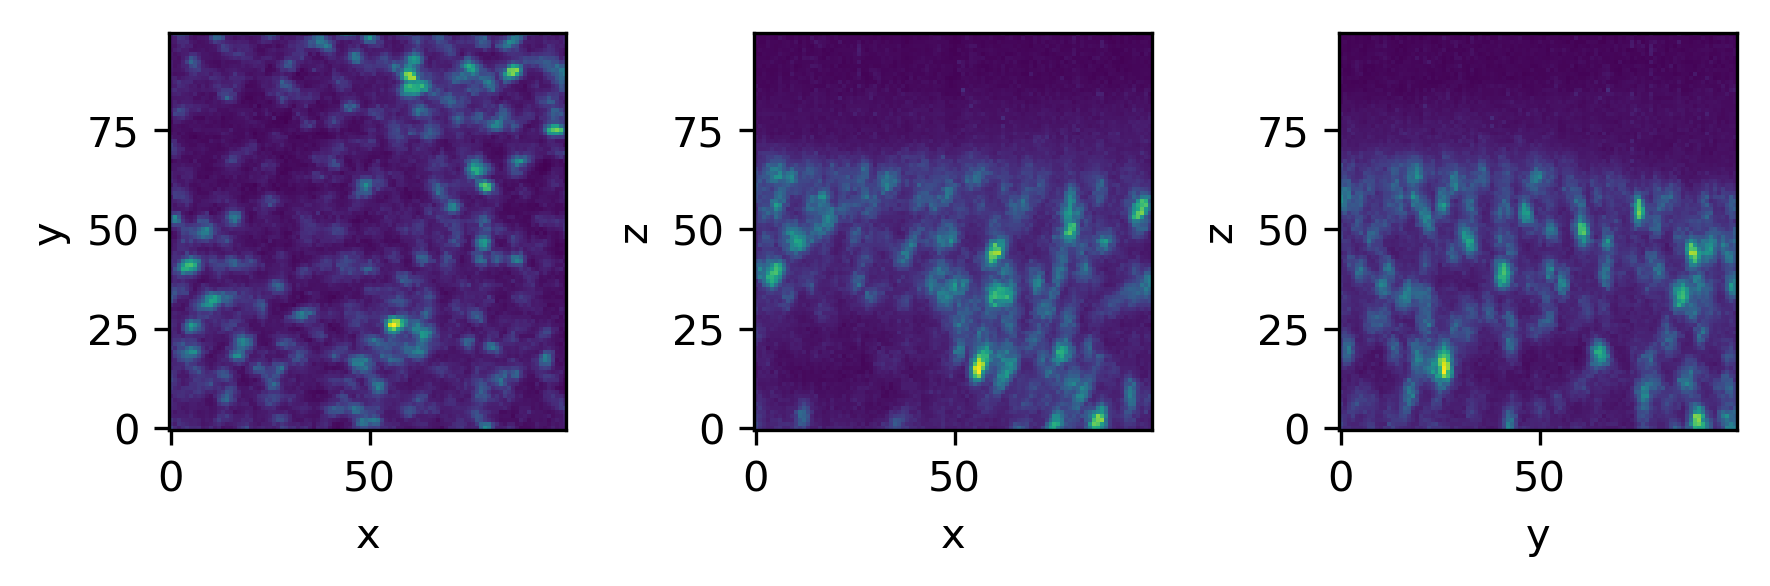

In [7]:
# read the image from where the detections come from

latticeMovieFrame = skimage.external.tifffile.imread(path + inputDataFolder+'/'+master_filesOfInterest[frameId])
latticeMovieFrame_shape = latticeMovieFrame.shape
print(latticeMovieFrame_shape)

tiffproc.maxIntensityProjection(latticeMovieFrame)

Text(0.5,1,'frameID 5')

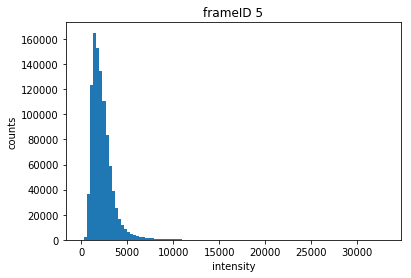

In [8]:
# read the image from where the detections come from

latticeMovieFrame = skimage.external.tifffile.imread(path + inputDataFolder+'/'+master_filesOfInterest[frameId])

plt.hist(latticeMovieFrame.flatten(),bins=100);
#plt.ylim(0,20000000) 
#plt.xlim(0,35000)
plt.xlabel('intensity')
plt.ylabel('counts')
plt.title('frameID '+str(frameId))

#  look at the fluorescence decay

In [9]:
# read the image from where the detections come from

m_frame_max = []
m_frame_mean = []
m_ratio = []
s_frame_max = []
s_frame_mean = []
s_ratio = []
for frameId in range(0,len(master_filesOfInterest)):

    
    
    latticeMovieFrame = skimage.external.tifffile.imread(path + inputDataFolder+'/'+master_filesOfInterest[frameId])
    
    m_firstFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+master_filesOfInterest[0])
    m_frame_max.append(np.max(latticeMovieFrame))
    m_frame_mean.append(np.mean(latticeMovieFrame))
    m_ratio.append(np.mean(latticeMovieFrame)/np.mean(m_firstFrame))
    
    latticeMovieFrame = skimage.external.tifffile.imread(path + inputDataFolder+'/'+slave_filesOfInterest[frameId])
    
    s_firstFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+slave_filesOfInterest[0])
    s_frame_max.append(np.max(latticeMovieFrame))
    s_frame_mean.append(np.mean(latticeMovieFrame))
    s_ratio.append(np.mean(latticeMovieFrame)/np.mean(s_firstFrame))



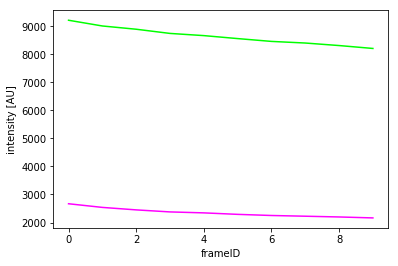

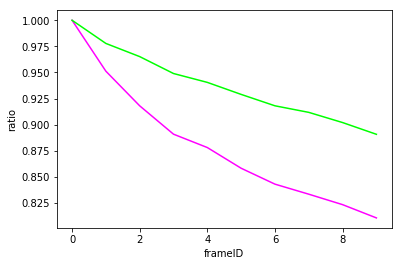

In [10]:
plt.plot(m_frame_mean,c='magenta')
plt.plot(s_frame_mean,c='lime')
plt.xlabel('frameID');
plt.ylabel('intensity [AU]');
plt.show()
#fig = plt.figure(dpi=300)
plt.plot(m_ratio,c='magenta')
plt.plot(s_ratio,c='lime')
plt.xlabel('frameID');
plt.ylabel('ratio');

In [11]:
# ratio method

In [12]:
# read the image from where the detections come from

for frameId in range(0,movieLength):

    
    # master files
    latticeMovieFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+master_filesOfInterest[frameId])
    

    data = latticeMovieFrame/m_ratio[frameId]
    metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
    metadata = json.dumps(metadata)
    
    output_filename = master_filesOfInterest[frameId]+'_ratioCorrected.tif'    
    skimage.external.tifffile.imsave(path+outputDataFolder+'/'+output_filename, data, description=metadata)
    print(path+outputDataFolder+'/'+output_filename)
    
    
    # slave files

    latticeMovieFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+slave_filesOfInterest[frameId])
    

    data = latticeMovieFrame/s_ratio[frameId]
    metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
    metadata = json.dumps(metadata)
    
    output_filename = slave_filesOfInterest[frameId]+'_ratioCorrected.tif'
    skimage.external.tifffile.imsave(path+outputDataFolder+'/'+output_filename, data, description=metadata)
    print(path+outputDataFolder+'/'+output_filename)

/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped_560_pm50px_maxAmpl_0000.tif_ratioCorrected.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped_488_pm50px_maxAmpl_0000.tif_ratioCorrected.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped_560_pm50px_maxAmpl_0001.tif_ratioCorrected.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped_488_pm50px_maxAmpl_0001.tif_ratioCorrected.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped_560_pm50px_maxAmpl_0002.tif_ratioCorrected.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped_488_pm50px_maxAmpl_0002.tif_ratioCorrected.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped_560_pm50px_maxAmpl_0003.tif_ratioCorrected.tif
/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/cropped

# model based method (exponential decay)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize



   

def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    print('linear',K,A_log)
    return A, K

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=10000,p0=(0 ,-0.3, 1500))
    A, K, C = opt_parms
    print('nonlinear',A,K,C)
    return A, K, C

def plot(ax, t, y, fit_y, fit_parms):
    A, K, C = fit_parms
    
    ax.plot(t, y, 'ro')
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))

    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)



In [14]:
frame_mean = []
for frameId in range(0,movieLength):
    latticeMovieFrame = skimage.external.tifffile.imread(path+inputDataFolder+'/'+master_filesOfInterest[frameId])
    frame_mean.append(np.average(latticeMovieFrame))

nonlinear 557.440554576 -0.223577378987 2102.0544497
557.440554576 -0.223577378987 2102.0544497
linear -0.0592196320042 6.99699142629


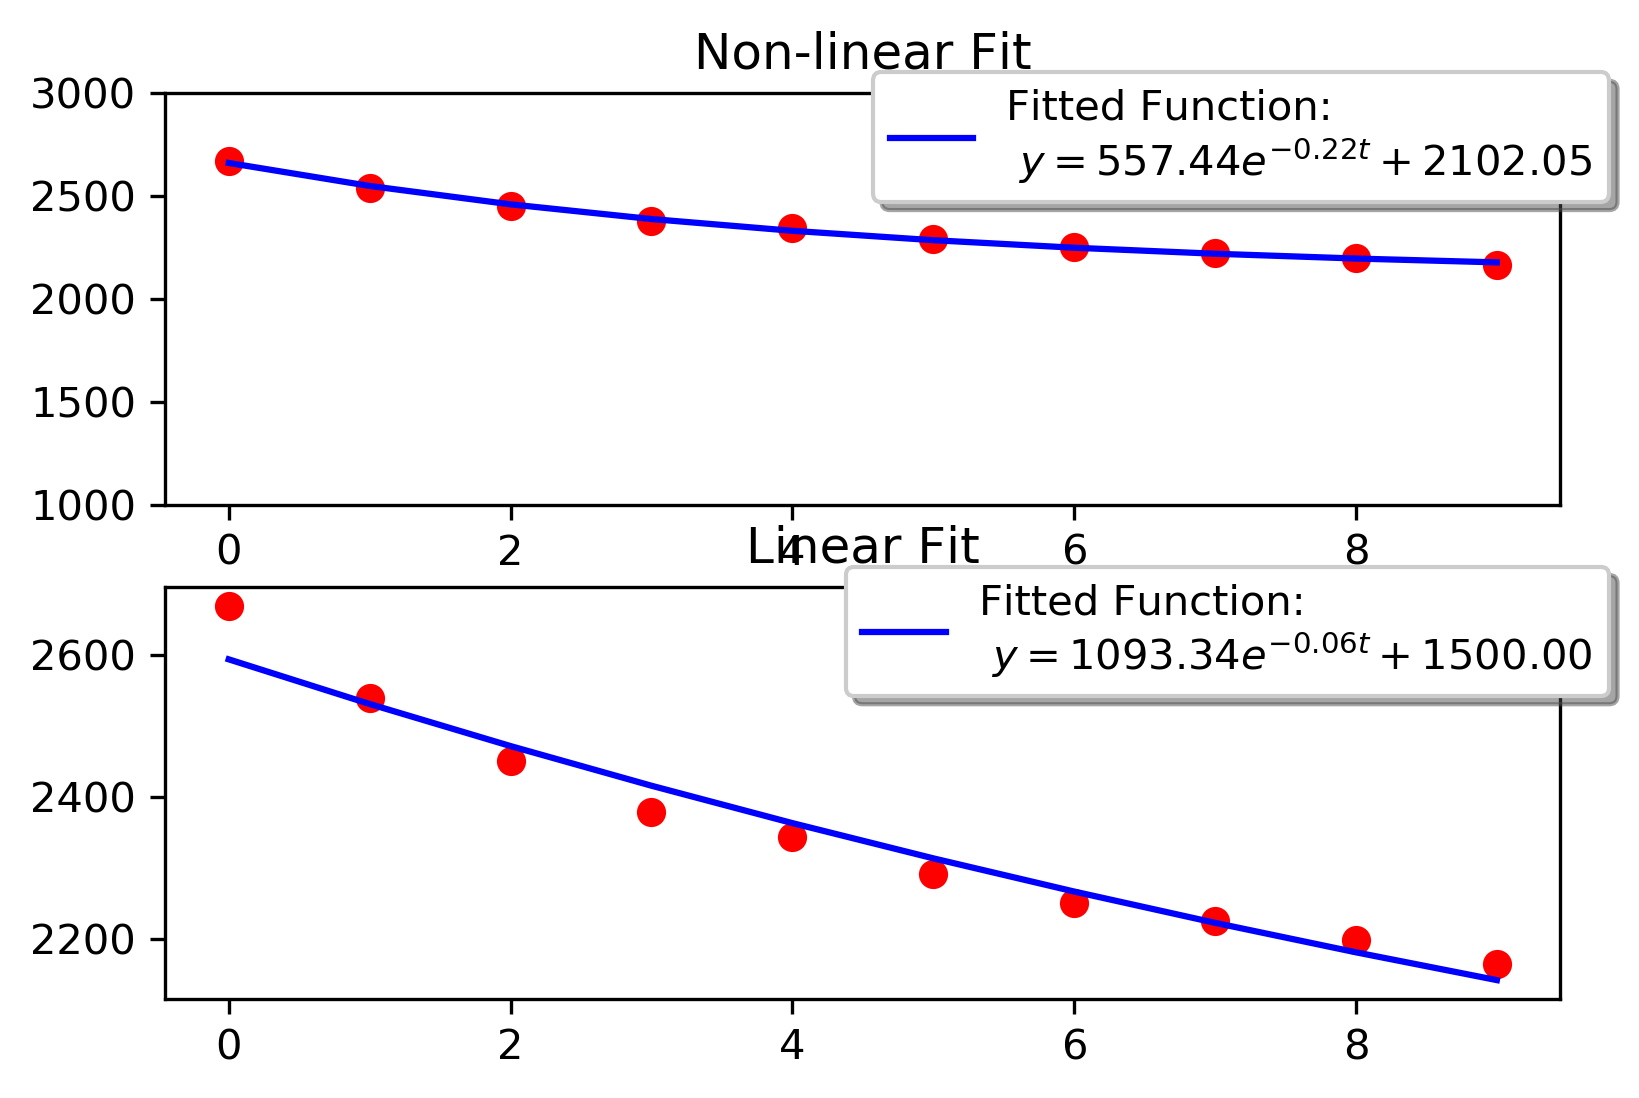

In [15]:


t = np.array(range(0,movieLength))
y = np.array(frame_mean)
C0= 1500


fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

    # Non-linear Fit
A, K, C = fit_exp_nonlinear(t, y)
print(A,K,C)
fit_y = model_func(t, A, K, C)
plot(ax1, t, y, fit_y, (A, K, C))
ax1.set_title('Non-linear Fit')
ax1.set_ylim(1000,3000)

    # Linear Fit (Note that we have to provide the y-offset ("C") value!!
A, K = fit_exp_linear(t, y, C0)
fit_y = model_func(t, A, K, C0)
plot(ax2, t, y, fit_y, (A, K, C0))
ax2.set_title('Linear Fit')

plt.show()